stage1
in loop 1
stage1
in loop 1


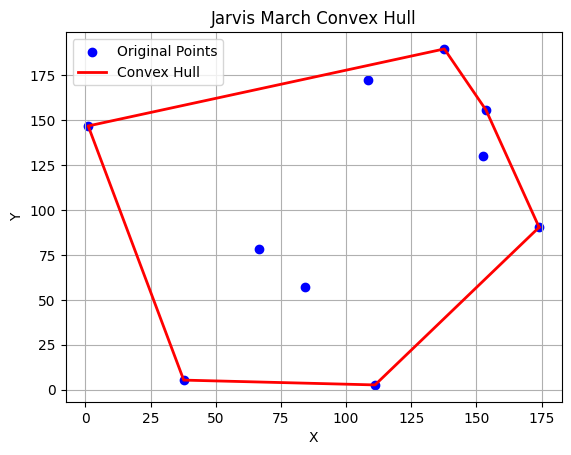

In [15]:
import math

import matplotlib.pyplot as plt
import numpy as np
import random
import timeit

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def orientation(p, q, r):
    """
    Function to find the orientation of an ordered triplet (p, q, r).
    Returns:
     0 : Collinear points
     1 : Clockwise points
     2 : Counterclockwise points
    """
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0  # Collinear
    return 1 if val > 0 else 2  # Clockwise or Counterclockwise

def jarvis_march(points):
    """
    Implementation of Jarvis March algorithm to find the convex hull of a set of points.
    """
    n = len(points)
    if n < 3:
        print("Jarvis March requires at least 3 points.")
        return []

    hull = []

    # Find the leftmost lowest point as the starting point
    start_point = min(points, key=lambda p: (p.y, p.x))
    current_point = start_point

    while True:
        hull.append(current_point)
        next_point = points[0]

        # Iterate through all points to find the next point in the convex hull
        for candidate_point in points:
            if candidate_point != current_point:
                orientation_val = orientation(current_point, next_point, candidate_point)

                # Handle collinear and counterclockwise points
                if orientation_val == 0 or orientation_val == 2:
                    # Calculate the cross product to determine the next point
                    cross_product = (candidate_point.x - current_point.x) * (next_point.y - current_point.y) - \
                                    (candidate_point.y - current_point.y) * (next_point.x - current_point.x)
                    if cross_product > 0:  # Candidate point is more counterclockwise
                        next_point = candidate_point
                    elif cross_product == 0:
                        # If collinear, choose the farthest point
                        dist_current_candidate = (candidate_point.x - current_point.x) ** 2 + \
                                                  (candidate_point.y - current_point.y) ** 2
                        dist_current_next = (next_point.x - current_point.x) ** 2 + \
                                             (next_point.y - current_point.y) ** 2
                        if dist_current_candidate > dist_current_next:
                            next_point = candidate_point
                # Handle clockwise points
                elif orientation_val == 1:
                    next_point = candidate_point

        current_point = next_point

        if current_point == start_point:
            break

    return hull

def plot_convex_hull(points, convex_hull):
    """
    Plot the original points and the convex hull.
    """
    x_values = [point.x for point in points]
    y_values = [point.y for point in points]

    hull_x = [point.x for point in convex_hull]
    hull_y = [point.y for point in convex_hull]
    hull_x.append(convex_hull[0].x)  # Close the convex hull
    hull_y.append(convex_hull[0].y)

    plt.scatter(x_values, y_values, color='blue', label='Original Points')
    plt.plot(hull_x, hull_y, color='red', linestyle='-', linewidth=2, label='Convex Hull')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Jarvis March Convex Hull')
    plt.grid(True)
    plt.show()

def generate_random_points(num_points, x_range, y_range):
    """
    Generate random points within the specified x and y ranges.
    
    Parameters:
    - num_points: Number of points to generate.
    - x_range: Tuple representing the range of x coordinates (min_x, max_x).
    - y_range: Tuple representing the range of y coordinates (min_y, max_y).
    
    Returns:
    - List of Point objects representing the random points.
    """
    random_points = []
    min_x, max_x = x_range
    min_y, max_y = y_range
    
    for _ in range(num_points):
        x = random.uniform(min_x, max_x)
        y = random.uniform(min_y, max_y)
        point = Point(x, y)
        random_points.append(point)
        ##print(f"Generated point: ({x}, {y})")
    
    return random_points

##############################################################################################################################

def grahamscan(inputSet):
    # Find point P which has the lowest y-coordinate (use the lowest x in case of ties)
    P = min(inputSet, key=lambda point: (point.y, point.x))
    
    # Array of points sorted by the angle they and the point P make with the x-axis
    sortedPoints = sorted(inputSet, key=lambda point: (polarAngle(P, point), -distance(P, point)))

    # Initialise our convex hull
    outputSet = [P]
    
    # Add new points to convex hull only if we take an anti-clockwise turn
    for newPoint in sortedPoints[1:]:
        while len(outputSet) >= 2 and not counterClockwise(outputSet[-2], outputSet[-1], newPoint):
            outputSet.pop()
        outputSet.append(newPoint)

    return outputSet

def polarAngle(p0, p1):
    yDistance = p1.y - p0.y
    xDistance = p1.x - p0.x
    angle = math.atan2(yDistance, xDistance)
    if angle < 0:
        angle += 2 * math.pi
    return angle

def distance(p0, p1):
    # Returns the square of the distance between two points
    return (p0.x - p1.x) ** 2 + (p0.y - p1.y) ** 2

def counterClockwise(p1, p2, p3):
    # Returns true if the sequence of points makes a counter-clockwise turn
    return ((p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)) > 0

##############################################################################################################################

def findrightmostpoint(inputSet): #find rightmost point according to the requirement
    point=None
    for i in inputSet:
        if point==None:
            point=i
        else:
            if i.x>point.x:
                point=i
    return point
     

def Hull2D(inputSet, m, H):
    flattened_subsets = []
    p=[]
    for i in range(0, len(inputSet), m):
        subset = []
        for j in range(i, min(i + m, len(inputSet))):
            subset.append(inputSet[j])  #create subsets of size m
        subset = grahamscan(subset)  # Use Graham Scan
        flattened_subsets.extend(subset)    
    p.append(Point(0,-math.inf))# first pont is the bottommost
    p.append(findrightmostpoint(inputSet)) #second point is the rightmost point
    next_point = flattened_subsets[0]
    print("stage1")
    for k in range(1,H):
        for candidate_point in flattened_subsets:
                current_point = p[k]
                if candidate_point != current_point:
                    orientation_val = orientation(current_point, next_point, candidate_point)

                    # Handle collinear and counterclockwise points
                    if orientation_val == 0 or orientation_val == 2:
                        # Calculate the cross product to determine the next point
                        cross_product = (candidate_point.x - current_point.x) * (next_point.y - current_point.y) - \
                                        (candidate_point.y - current_point.y) * (next_point.x - current_point.x)
                        if cross_product > 0:  # Candidate point is more counterclockwise
                            next_point = candidate_point
                        elif cross_product == 0:
                            # If collinear, choose the farthest point
                            dist_current_candidate = (candidate_point.x - current_point.x) ** 2 + \
                                                    (candidate_point.y - current_point.y) ** 2
                            dist_current_next = (next_point.x - current_point.x) ** 2 + \
                                                (next_point.y - current_point.y) ** 2
                            if dist_current_candidate > dist_current_next:
                                next_point = candidate_point
                    # Handle clockwise points
                    elif orientation_val == 1:
                        next_point = candidate_point     
        p.append(next_point) # join the ponts to the list
        if p[1]==p[k+1]: # if finished, return the list
            return p
    return "incomplete"# if fails, return incomplete
   
def chan(inputSet): # this part is done underguidence of the paper
    t = 1
    length = len(inputSet)
    while True:
        m = H = min(2**2**t, length)
        L = Hull2D(inputSet, m, H)
        print("in loop 1")
        if L!="incomplete":
            break
        t = t+1  # Increment t
    return L
# Generate 20 random points within the range x: (0, 20), y: (0, 20)
random_points = generate_random_points(30, (0, 200), (0, 200))
# Compute the convex hull
new_convex_hull_points1 = chan(random_points)
#new_convex_hull_points2 = grahamscan(random_points)
#new_convex_hull_points3 = jarvis_march(random_points)

# Plot the original points and the convex hull
plot_convex_hull(random_points, new_convex_hull_points1)
